In [ ]:
import os

In [ ]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [ ]:
import config
import math
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import cityscapes_labels
import utils
from generator import *

from models import *
from keras import losses, metrics, optimizers
from metrics import precision, dice_coef

import time
import pylab as pl
from IPython import display

In [ ]:
target_size = 256, 512
batch_size = 2
epochs = 1
dataset_path = config.data_path()

In [5]:
datagen = CityscapesFlowGenerator(dataset_path, prev_skip=0)

('-- Cityscapes Previous skip', 0)
--- flip False
/home/mlyko/data/cityscapes/
Cityscapes: train 2975 files
Cityscapes: shuffling dataset
Cityscapes: val 500 files
Cityscapes: shuffling dataset
Cityscapes: test 1525 files
Cityscapes: shuffling dataset
training samples 2975, validating samples 500, test samples 1525


In [6]:
!ls /home/mlyko/weights/city/rel/ICNetWarp1/


diff_bwb16_lr=0.000100_dec=0.005000.h5
lc1.0+0.99b16_lr=0.001000_dec=0.009000.h5
minmax_lc1-1.0+1.0b16_lr=0.002100_dec=0.003000_150_finished.h5
minmax_lc1-1.0+1.0b16_lr=0.002100_dec=0.003000.h5
opening_concatb16_lr=0.000900_dec=0.100000.h5
opening_concatb16_lr=0.002100_dec=0.003000_150_finished.h5
opening_concatb16_lr=0.002100_dec=0.003000.h5


In [8]:
w_path = config.weights_path() + 'city/'
models = [
  #  (SegNet(target_size, datagen.n_classes),  w_path + 'SegNet/spat_drop04.h5'),
  #  (SegNetWarpDiff123(target_size, datagen.n_classes), w_path + 'SegNetWarpDiff/diff_p0_w123_s04_2.h5'),
  #  (SegNetWarpDiff123(target_size, datagen.n_classes),w_path + '/rel/SegNetWarpDiff123/diff_p0_w123_s04_norm_eq_hist_dec_0001_g2.h5'),
   # (MobileUNet(target_size, datagen.n_classes), w_path + '/rel/MobileUNet/mobile_unet_warp1.h5'),
#    (MobileUNetWarp2(target_size, datagen.n_classes), w_path + '/rel/MobileUNetWarp2/warp2.h5'),
#    (ICNet(target_size, datagen.n_classes, for_training=False), w_path + '/rel/ICNet/b16_lr9e-4_dec=5e-3.h5'),
    (ICNetWarp1(target_size, datagen.n_classes, for_training=False), w_path + '/rel/ICNetWarp1/opening_concatb16_lr=0.002100_dec=0.003000.h5'),
]

for m, w in models:
    print("loading model %s" % m.name)
    m.compile()
    m.k.load_weights(w, by_name=True)
    

loading model ICNetWarp1
-- Optimizer: Adam
('---- Params: ', {'lr': 0.0021, 'decay': 0.003})
('---- For Training: ', False)


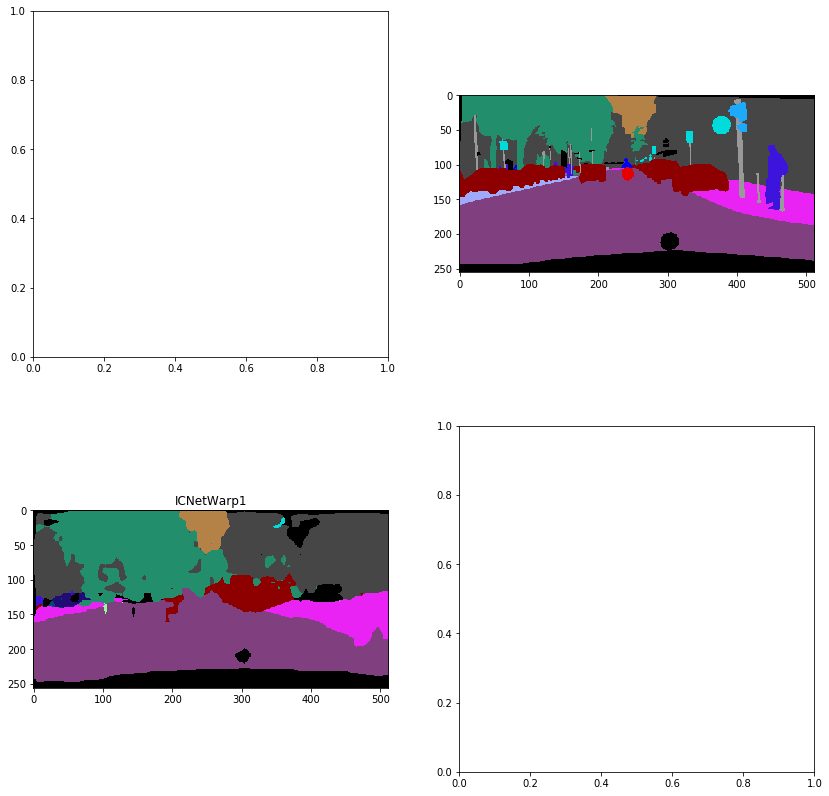

KeyboardInterrupt: 

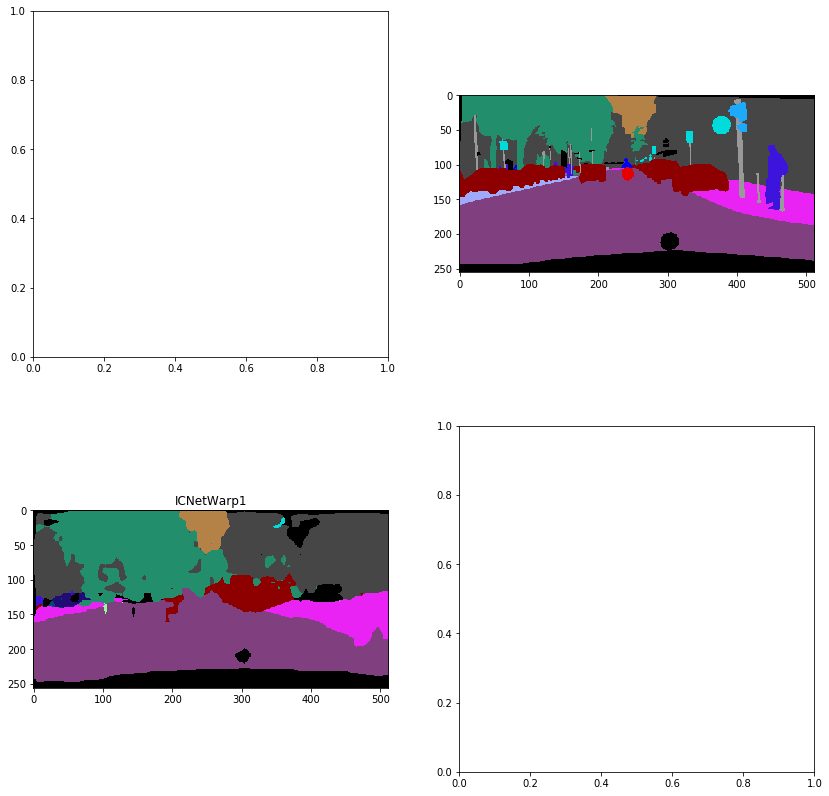

In [9]:
f, arr= plt.subplots(2,2)
#f, arr= plt.subplots(3,3)
f.set_size_inches(14,14)
for imgBatch, labelBatch in datagen.flow('val',1,target_size):
    predictions = []
    colored = []

    imgNew = imgBatch[1][0]
    #predicting_image = cv2.cvtColor( imgNew,  cv2.COLOR_BGR2RGB)
    predicting_image = imgNew
    
#    i = 0
#    print(models[i][0].name)
#    predictions.append(models[i][0].k.predict(np.array([imgNew]), batch_size, verbose=1))
#    colored.append(datagen.one_hot_to_bgr(predictions[i][0], target_size, datagen.n_classes, datagen.labels))

    
#    i = 0
#    print(models[i][0].name)
#    predictions.append(models[i][0].k.predict(np.array([imgNew]), batch_size, verbose=1))
#    colored.append(datagen.one_hot_to_bgr(predictions[i], target_size, datagen.n_classes, datagen.old_labels))
    
#    i += 1
#    print(models[i][0].name)
#    predictions.append(models[i][0].k.predict(imgBatch, batch_size, verbose=1))
#    colored.append(datagen.one_hot_to_bgr(predictions[i], target_size, datagen.n_classes, datagen.old_labels))
#
#    i += 1
#    print(models[i][0].name)
#    predictions.append(models[i][0].k.predict(imgBatch, batch_size, verbose=1))
#    colored.append(datagen.one_hot_to_bgr(predictions[i], target_size, datagen.n_classes, datagen.labels))
#    
#    i += 1

    i = 0
    print(models[i][0].name)
    predictions.append(models[i][0].k.predict(imgBatch, batch_size, verbose=1))
    colored.append(datagen.one_hot_to_bgr(predictions[i], target_size, datagen.n_classes, datagen.labels))
        

#    arr[0][0].imshow(predicting_image)
#    target_size_14 = tuple(a // 4 for a in target_size)
#    l = cv2.resize(labelBatch[0], target_size)
    arr[0][1].imshow(datagen.one_hot_to_bgr(labelBatch[0], target_size, datagen.n_classes, datagen.labels))
    
    for p in range(len(models)):
        row = int(math.floor(p / 2)) + 1
        col = p % 2
        arr[row][col].set_title(models[p][0].name)
        arr[row][col].imshow(colored[p])
    
#    arr[1][2].imshow(colored[1] - colored[0])
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(4.0)